In [1]:
greetings = "Assalam-o-Alaikum!"
greetings

'Assalam-o-Alaikum!'

### Import Libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [262]:
# dataset
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Statistical Analysis

In [214]:
# statistical description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# shape
df.shape

(25, 2)

In [7]:
# data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# total rows
df.count()

Hours     25
Scores    25
dtype: int64

Text(0, 0.5, 'Scors')

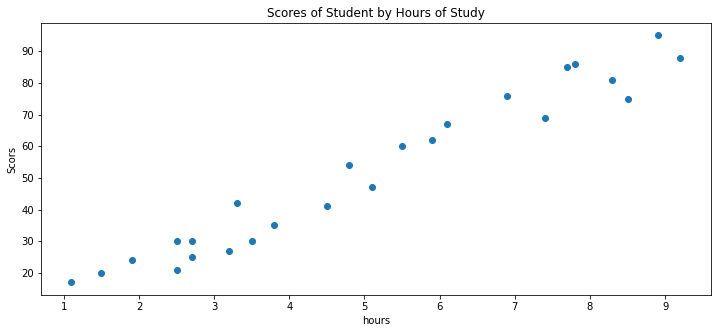

In [9]:
# scatter plot
plt.figure(figsize = (12, 5))
plt.scatter(x = "Hours", y = "Scores", data = df)
plt.title("Scores of Student by Hours of Study")
plt.xlabel("hours")
plt.ylabel("Scors")

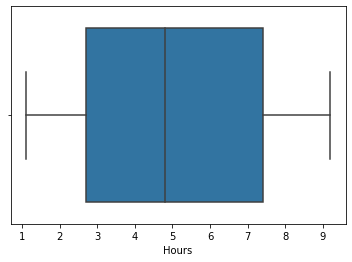

In [10]:
# Most of Students Study Between 2.7 to 7.4 Hours
sns.boxplot(x = df["Hours"])

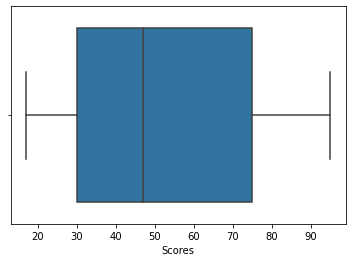

In [11]:
# Most Students have score between 30 to 75
sns.boxplot(x = df["Scores"])

In [12]:
# First 25%
Q1 = df.quantile(0.25)
Q1

Hours      2.7
Scores    30.0
Name: 0.25, dtype: float64

In [13]:
# Second 50%
Q2 = df.quantile(0.50)
Q2

Hours      4.8
Scores    47.0
Name: 0.5, dtype: float64

In [14]:
# Third 75%
Q3 = df.quantile(0.75)
Q3

Hours      7.4
Scores    75.0
Name: 0.75, dtype: float64

In [260]:
# InterQuantile Range
IQR = Q3 - Q1
IQR

Hours      4.7
Scores    45.0
dtype: float64

Text(0.5, 1.0, 'Hours of study by frequency')

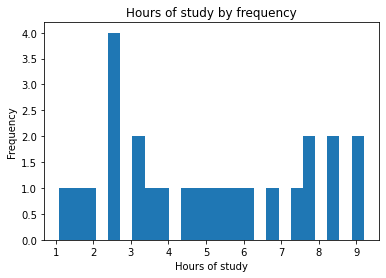

In [15]:
# Histogram of Study Hours
plt.hist(df["Hours"], bins = 25)
plt.xlabel("Hours of study")
plt.ylabel("Frequency")
plt.title("Hours of study by frequency")

Text(0.5, 1.0, 'Scores in Exams by frequency')

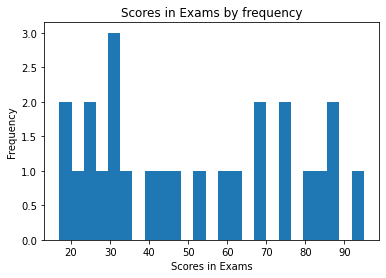

In [263]:
# Histogram of Scores in Exams
plt.hist(df["Scores"], bins = 25)
plt.xlabel("Scores in Exams")
plt.ylabel("Frequency")
plt.title("Scores in Exams by frequency")

In [215]:
# Pass : Numbers > 50
df["Status"] = df["Scores"] > 50
df.head()

,Hours,Scores,Status
0,2.5,21,False
1,5.1,47,False
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False


In [216]:
# Replace
df["Status"].replace([True, False], ["Pass", "Fail"], inplace = True)
df.head()

,Hours,Scores,Status
0,2.5,21,Fail
1,5.1,47,Fail
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail


In [217]:
# Dummies
dummy = pd.get_dummies(df["Status"])
df = pd.concat([df, dummy], axis = 1)
df.drop("Status", axis = 1, inplace = True)
df.head()

,Hours,Scores,Fail,Pass
0,2.5,21,1,0
1,5.1,47,1,0
2,3.2,27,1,0
3,8.5,75,0,1
4,3.5,30,1,0


In [218]:
Total_Students = df.shape[0]
Total_Students

25

In [22]:
Pass_Students = df["Pass"].sum()
print("Total Number of Passed Students are " + str(Pass_Students))

Total Number of Passed Students are 12


In [23]:
Failed_Students = df["Fail"].sum()
print("Total Number of Failed Students are " + str(Failed_Students))

Total Number of Failed Students are 13


In [24]:
Pass_Percentage = (Pass_Students / Total_Students) * 100
Pass_Percentage

48.0

In [25]:
Fail_Percentage = (Failed_Students / Total_Students) * 100
Fail_Percentage

52.0

In [27]:
ratio = Pass_Percentage / Fail_Percentage
print("Success to Fail Ratio ratio")

Success to Fail Ratio ratio


### Correlation

In [28]:
## Pearson Correlation
pearson_coef, p_value = stats.pearsonr(df["Scores"], df["Hours"])
p_value

9.132624467459357e-17

In [30]:
pearson_coef

0.9761906560220887

In [31]:
# Correlation
df.iloc[0:2, 0:2].corr()

,Hours,Scores
Hours,1.0,1.0
Scores,1.0,1.0


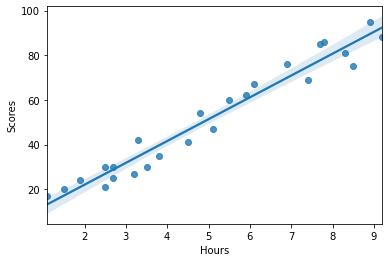

In [32]:
# Scatter Plot
sns.regplot(x = "Hours", y = "Scores", data = df)

In [219]:
df["Status"] = df["Scores"] > 50

In [220]:
df["Status"].replace([True, False], ["Pass", "Fail"], inplace = True)
df.head()

,Hours,Scores,Fail,Pass,Status
0,2.5,21,1,0,Fail
1,5.1,47,1,0,Fail
2,3.2,27,1,0,Fail
3,8.5,75,0,1,Pass
4,3.5,30,1,0,Fail


In [221]:
# Pivot Table
df_group1 = df[["Status", "Hours", "Scores"]]
x = df_group1.groupby(["Status", "Hours"])
x.first()

Scores
Status Hours        
Fail   1.1        17
       1.5        20
       1.9        24
       2.5        21
       2.7        25
       3.2        27
       3.3        42
       3.5        30
       3.8        35
       4.5        41
       5.1        47
Pass   4.8        54
       5.5        60
       5.9        62
       6.1        67
       6.9        76
       7.4        69
       7.7        85
       7.8        86
       8.3        81
       8.5        75
       8.9        95
       9.2        88

In [67]:
df_group2 = df[["Status", "Hours", "Scores"]]
y = df_group2.groupby(["Status", "Scores"])
y.first()

Hours
Status Scores       
Fail   17        1.1
       20        1.5
       21        2.5
       24        1.9
       25        2.7
       27        3.2
       30        3.5
       35        3.8
       41        4.5
       42        3.3
       47        5.1
Pass   54        4.8
       60        5.5
       62        5.9
       67        6.1
       69        7.4
       75        8.5
       76        6.9
       81        8.3
       85        7.7
       86        7.8
       88        9.2
       95        8.9

### Linear Regression

In [240]:
# train test split
a = df[["Hours"]]
b = df["Scores"]
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 0)
lr.fit(x_train, y_train)
lr.score(a, b)
yhat = lr.predict(x_test)
yhat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [241]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [249]:
# Prediction
hours = 9.25
score = lr.predict([[hours]])
print("No of Hours " + str(hours))
print("Predicted Score = " + str(score[0]))

No of Hours 9.25
Predicted Score = 93.69173248737538


In [259]:
# Mean Squared Error
mse = metrics.mean_absolute_error(y_test, yhat)
mse

4.183859899002975

### Cross Validation

In [264]:
# Function cross_val_score()
lr = LinearRegression()
scores = cross_val_score(lr, a, b, cv = 3)
scores

array([0.90059648, 0.95290326, 0.93422769])

In [265]:
# Cross val predict
yhat = cross_val_predict(lr, a, b, cv = 3)
yhat

array([28.06609687, 54.67794872, 35.23082621, 89.47806268, 38.3014245 ,
       17.83076923, 96.64279202, 58.77207977, 87.43099715, 28.13377529,
       76.23258605, 58.91701417, 45.44934716, 33.90563258, 12.74215585,
       87.77630063, 26.20982286, 20.53555036, 60.98054463, 73.49923333,
       28.23935879, 48.46185593, 38.83209539, 68.68435306, 77.35113755])

In [266]:
# Fit Model
lr.fit(x_train[["Hours"]], y_train)

LinearRegression()

In [267]:
# Train
yhat_train = lr.predict(x_train[["Hours"]])
yhat_train

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [270]:
# Test
yhat_test = lr.predict(x_test[["Hours"]])
yhat_test

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Actual vs Predicted

In [272]:

# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Hours of Study')
    plt.ylabel('Score in Exams')

    plt.show()
    plt.close()

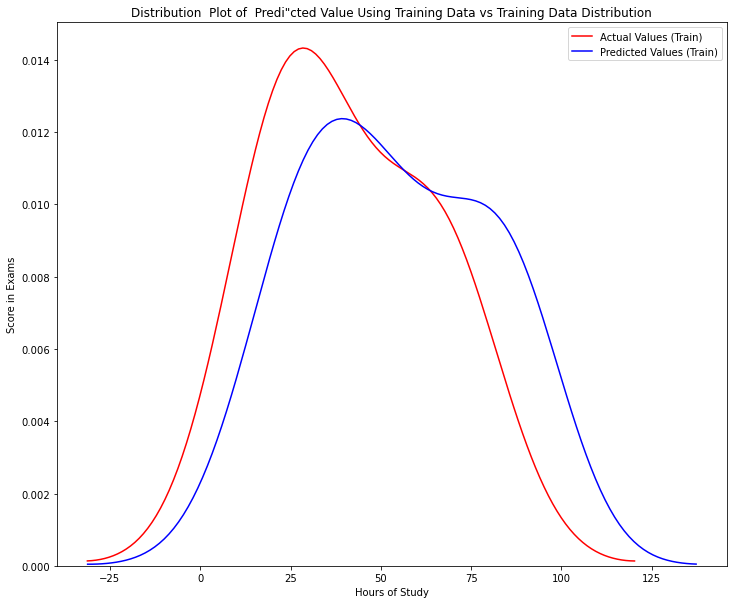

In [273]:
Title = 'Distribution  Plot of  Predi"cted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

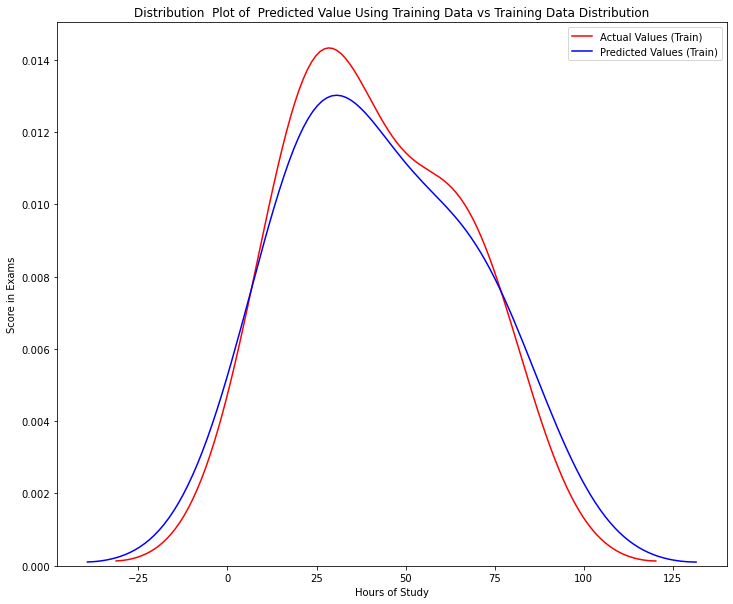

In [274]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)